In [1]:
import pandas as pd
import numpy as np
import cvxpy as cvx
import random
import time
from __future__ import print_function
from builtins import input


from scipy.linalg import hadamard

import matplotlib.pyplot as plt

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

import time 
from scipy import stats
from matplotlib import pyplot
#plt.style.use('ggplot')
plt.style.use('seaborn-dark-palette')
#iHiV = pd.read_pickle("~/bge-analysis-simv3/iHiV.pkl")
#B = pd.read_pickle("~/bge-analysis-simv3/B.pkl")


import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_absolute_percentage_error as mape



import matplotlib.font_manager as fm


fontSize=12
fontSizeSmall=10
labelSize=8


machine_precision=1e-6



SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

BIGGEST_SIZE = 18
# plt.rc('font', size=SMALL_SIZE, family='sans-serif', serif='Arial')          # controls default text sizes
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE, titleweight='bold')     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE, labelweight='bold')    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('text')


gs_font = fm.FontProperties(fname='gillsans.ttf', size=20, weight='bold')
light_grey=(0.5,0.5,0.5)


In [3]:
import matplotlib as mpl
from matplotlib import pyplot
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'sans-serif'
def set_violin_color(vp,color,mediancolor):
    plt.setp(vp['bodies'], facecolor=color, edgecolor="white",alpha=0.7)
    plt.setp(vp['cbars'], color = color)
    plt.setp(vp['cmins'], color = "black")
    plt.setp(vp['cmaxes'], color = "black")
    plt.setp(vp['cmeans'], color = "black")
    plt.setp(vp['cmedians'],color = mediancolor)

def make_violin_plot(dataframe,col0,mediancolor,legendlabel,diff):
    stepepi_master0 = dataframe
    bp0 = plt.violinplot(stepepi_master0, positions=np.array(range(len(stepepi_master0)))*3.0+diff,showmeans = True,showmedians=True)
    positions=np.array(range(len(stepepi_master0)))
    set_violin_color(bp0,col0,mediancolor)
    plt.plot([], c=col0, label=legendlabel)
    plt.legend(loc='upper left') 
    return positions

import seaborn as sns
colorlist1 = sns.color_palette("bright").as_hex()
sns.color_palette("bright")

from sklearn.metrics import r2_score

pa_redv1 = pd.read_pickle("~/compressed_sensingv1/realdatasets/misc/ophelli-ryan/eff-16-list1-red-pa.pkl")

##### compile the well numbers for each species for its presence 

species_ones = []
for i in range(16):
    species_ones.append(pa_redv1[pa_redv1[i]==1.0]["well number"].values)

ones_len = [] 
for ii in range(len(species_ones)):
    ones_len.append(len(species_ones[ii])) 

In [5]:
#### analysis part begins 
crossdf = pd.read_pickle("WH-REL-analysisjan23.pkl")
crosslindf = pd.read_pickle("sigma-REL-analysisjan23.pkl")

In [6]:
labdl = np.round(np.logspace(-5,0.8,5),5)
lam = list(labdl)
lam.append([0.5,0.6,1.0])
lamf = list(pd.DataFrame(lam)[0].explode().values)
lamf.sort()
lamf = lamf[:7]
lamf

[1e-05, 0.00028, 0.00794, 0.22387, 0.5, 0.6, 1.0]

In [7]:
n = 2**16
cv_splitsl = [2,3,5,6,7]
random_state = None
laml = lamf

In [8]:
bias_var_listm = [3,3,3,3,3,3,3,3,5,3,5,3,3,7,5,7]
#bias_var_listm = [2,2,2,2,2,2,2,2,3,2,3,2,2,5,3,5]
#bias_var_listm = [2]*16

In [9]:
best =  [] 
for cv in cv_splitsl:
    cf = crossdf[crossdf["k-fold"]==cv]
    for species in range(16):
        sp = cf[cf["sp"]==species]
        best.append([species,cv,sp.T[sp["nnseagg"].idxmax()]["nnseagg"],sp.T[sp["nnseagg"].idxmax()]["lambda"]])


In [10]:
bestlin =  [] 
for cv in cv_splitsl:
    cf = crosslindf[crosslindf["k-fold"]==cv]
    for species in range(16):
        sp = cf[cf["sp"]==species]
        bestlin.append([species,cv,sp.T[sp["nnseagg"].idxmax()]["nnseagg"],sp.T[sp["nnseagg"].idxmax()]["lambda"]])


In [12]:
bestwhdf = pd.DataFrame(best)
bestlindf = pd.DataFrame(bestlin)

In [13]:
data1 = []
for species in range(16):
    bestm = bestwhdf[bestwhdf[1]==bias_var_listm[species]]
    bestm.index = np.arange(0,16,1)
    data1.append(bestm.iloc[species][2])
data2  = []
for species in range(16):
    bestm = bestlindf[bestlindf[1]==bias_var_listm[species]]
    bestm.index = np.arange(0,16,1)
    data2.append(bestm.iloc[species][2])

In [14]:
colors1 = sns.color_palette("summer").as_hex()
pcol1 = colors1[0]
colors2 = sns.color_palette("flare").as_hex()
pcol2 = colors2[3]


sampper = ["Compressive Sensing","$l1$-regularised regression"] 
colors = [pcol2,pcol1]

data = [data1,data2]

In [15]:
h = pd.DataFrame(data1)
h["lin"] = data2

h = h.rename(columns={0:"wh"})

In [16]:
pd.to_pickle(h,"OV-v2-perjan23.pkl")

In [17]:
h

,wh,lin
0,0.692283,0.563305
1,0.916050,0.837987
2,0.686272,0.665267
3,0.821756,0.598105
4,0.599663,0.518129
5,0.587120,0.487338
6,0.751967,0.633981
7,0.588239,0.563592
8,0.507881,0.503632
9,0.414957,0.417135


In [18]:
pd.read_pickle("~/compressed_sensingv1/realdatasets/OV-v2/cs-l1-perOV.pkl")

,wh,lin
0,0.692283,0.563305
1,0.916050,0.837987
2,0.686272,0.665267
3,0.821756,0.598105
4,0.599663,0.518129
5,0.587120,0.487338
6,0.751967,0.633981
7,0.588239,0.563592
8,0.507881,0.503632
9,0.414957,0.417135


In [36]:
print("means=" ,h["wh"].mean(),h["lin"].mean())
h.index = np.arange(0,16,1)

def statistic(x, y, axis):

    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

statistic(h["wh"],h["lin"],0)
from scipy import stats 
res = stats.permutation_test((h["wh"], h["lin"]), statistic, vectorized=True,

                       n_resamples=np.inf, alternative='greater',permutation_type='samples')

print("statistic= ",res.statistic)

print("p-value = ",res.pvalue)
#res.null_distribution

def stars(p):
   if p < 0.0001:
       return "****"
   elif (p < 0.001):
       return "***"
   elif (p < 0.01):
       return "**"
   elif (p < 0.05):
       return "*"
   else:
       return "ns"

    
from scipy.stats import mannwhitneyu,wilcoxon,kruskal,brunnermunzel
w, p2= wilcoxon(h["wh"].values, h["lin"].values, alternative='greater')
alpha = 0.05
if p2 > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
print("Wilcoxon stat = ",w,p2)

means= 0.6759410645383064 0.6038251327630152
statistic=  0.0721159317752913
p-value =  3.0517578125e-05
Different distribution (reject H0)
Wilcoxon stat =  135.0 3.0517578125e-05


In [60]:
obs_sp = []
pred_sp = []
for sp in range(16):
    sp3 = crossdf[crossdf["sp"]==sp]
    cv3 = sp3[sp3["k-fold"]==bias_var_listm[species]]
    optlambda = bestwhdf[bestwhdf[1]==bias_var_listm[species]]
    optl = optlambda[optlambda[0]==sp][3].values[0]
    yobs =  cv3[cv3["lambda"]==optl]["testact"].values[0]
    obs_sp.append(yobs)
    ypred =  cv3[cv3["lambda"]==optl]["testpred"].values[0]
    pred_sp.append(ypred)
    rval2 = r2_score(yobs,ypred)
    gop2 = 1/(2-rval2)
    #plt.scatter(yobs,ypred,color="red")

In [61]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [62]:
colorlist = ["magenta","deepskyblue","green","darkorange","dimgrey"]

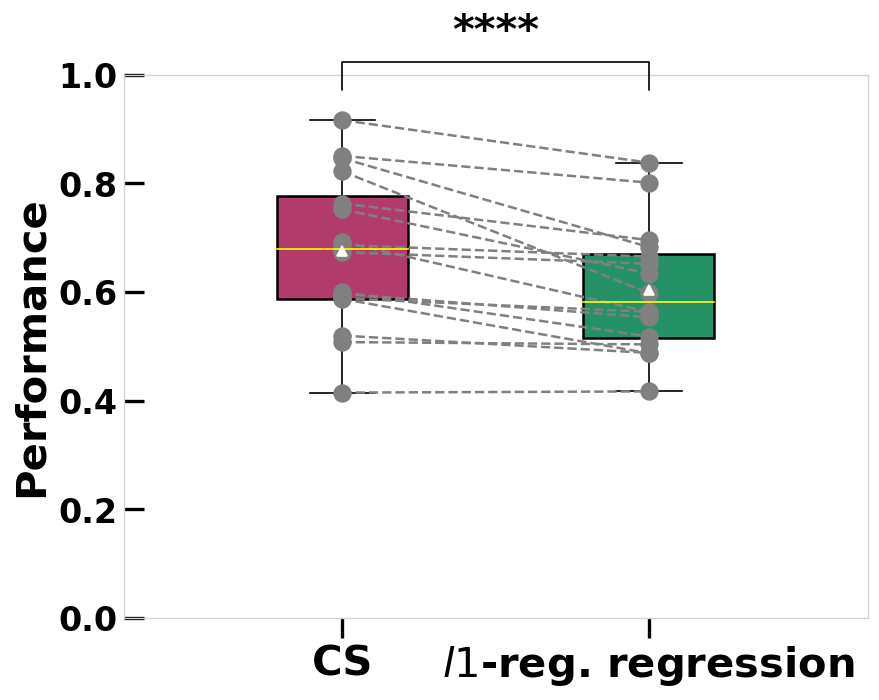

In [63]:

sampper = ["CS","$l1$-reg. regression"] 

fig, ax = plt.subplots(figsize=(8,6),dpi=120)
meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"white"}
box_dict = ax.boxplot(data, patch_artist=True,  showmeans=True,meanprops=meanprops,medianprops=dict(color="yellow"),positions=[0.5,1.2],widths=0.3)
for item in ['boxes']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, edgecolor="k",facecolor=color,linewidth=1.5)
for item in ['fliers']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, color=color,linewidth=1)
# whiskers and caps have to be treated separately since there are two of each for each plot
for item in ['whiskers', 'caps']:
    for sub_items,color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
        plt.setp(sub_items, color="k",linewidth=1)
plt.ylim(-0.0,1);
gs_font2 = fm.FontProperties(size=25, weight='bold')
plt.ylabel("Performance",font_properties=gs_font2);
 
gs_font4 = fm.FontProperties(size=20, weight='bold')

plt.yticks(fontproperties=gs_font4,rotation=0,color="grey")
gs_font3 = fm.FontProperties(size=25, weight='bold')
plt.xticks([0.5,1.2],sampper,rotation=0,color="grey",fontproperties=gs_font3)
ax.tick_params(axis="x",direction='out', length=12, width=2, colors='black',
              grid_color='lightgray', grid_alpha=0.9)
ax.tick_params(axis="y",direction='in', length=12, width=2, colors='black',
              grid_color='lightgray', grid_alpha=0.9) 
ticklabelcolor = 'lightgrey'
#plt.grid(linestyle=':', linewidth=1, color='grey')    
ax.spines['top'].set_color(ticklabelcolor)
ax.spines['bottom'].set_color(ticklabelcolor)
ax.spines['left'].set_color(ticklabelcolor)
ax.spines['right'].set_color(ticklabelcolor)
listpp = h[["wh","lin"]].values
list2 = [0.5,1.2]
for i in range(len(listpp)):
    plt.plot(list2,listpp[i],ls="dashed",color="grey",marker="o",markersize=10)
y_max = np.max(np.concatenate((h["wh"].values,h["lin"].values)))
y_min = np.min(np.concatenate((h["wh"].values,h["lin"].values)))
ax.annotate("", xy=(0.5, y_max+0.05), xycoords='data',
           xytext=(1.2, y_max+0.05), textcoords='data',
           arrowprops=dict(arrowstyle="-", ec="k",
                           connectionstyle="bar,fraction=0.1"))
ax.text(.85, y_max + abs(y_max - y_min)*0.325, stars(res.pvalue),
       horizontalalignment='center',
       verticalalignment='center',fontproperties=gs_font2);
#plt.savefig("will-rel-abun-boxplots-compare.svg")

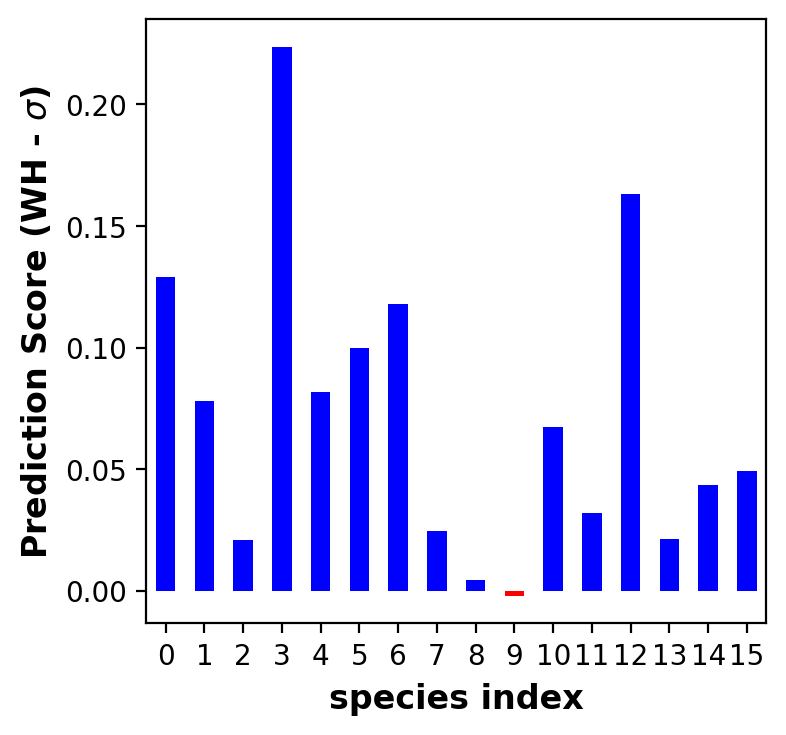

In [64]:
plt.figure(figsize=(4,4),dpi=200)
df1 = pd.DataFrame(h["wh"]-h["lin"])
df1['positive'] = df1[0] > 0
x = df1.index
df1[0].plot(kind="bar", rot=0,color=df1.positive.map({True: 'b', False: 'r'}));
plt.ylabel("Prediction Score (WH - $\sigma$)");
plt.xlabel("species index",rotation=0);
#plt.savefig("will-sp.png")

In [65]:
slope, intercept,r_value, p_value, std_err = stats.linregress(flatten(obs_sp),flatten(pred_sp))
print("slope, intercept, r2 = ",slope,intercept,r_value**2)

x = np.linspace(0,1,1000)
y = slope*x + intercept

x45 = np.linspace(0,1,1000)
y45 = x45

slope, intercept, r2 =  0.7193580269194173 0.08848953193836076 0.7011067707963763


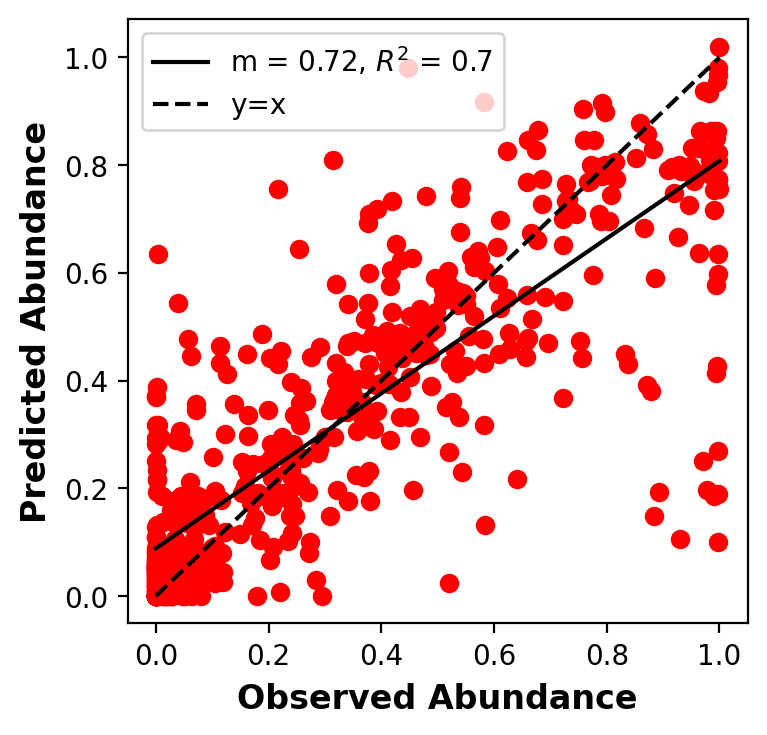

In [66]:
plt.figure(figsize=(4,4),dpi=200)
plt.scatter(flatten(obs_sp),flatten(pred_sp),color="red");
plt.xlabel("Observed Abundance");
plt.ylabel("Predicted Abundance");
plt.plot(x,y,"black",label="m = " +str(np.round(slope,2))+", " +"$R^2$" +" = "+ str(np.round(r_value**2,2)))
plt.plot(x45,y45,"black",ls="dashed",label="y=x");
plt.legend();

In [67]:
df1.to_pickle("OV-sp-v2.pkl")

In [68]:
datawill = [flatten(obs_sp),flatten(pred_sp)]
pd.to_pickle(datawill,"OV-v2-cvabun.pkl")

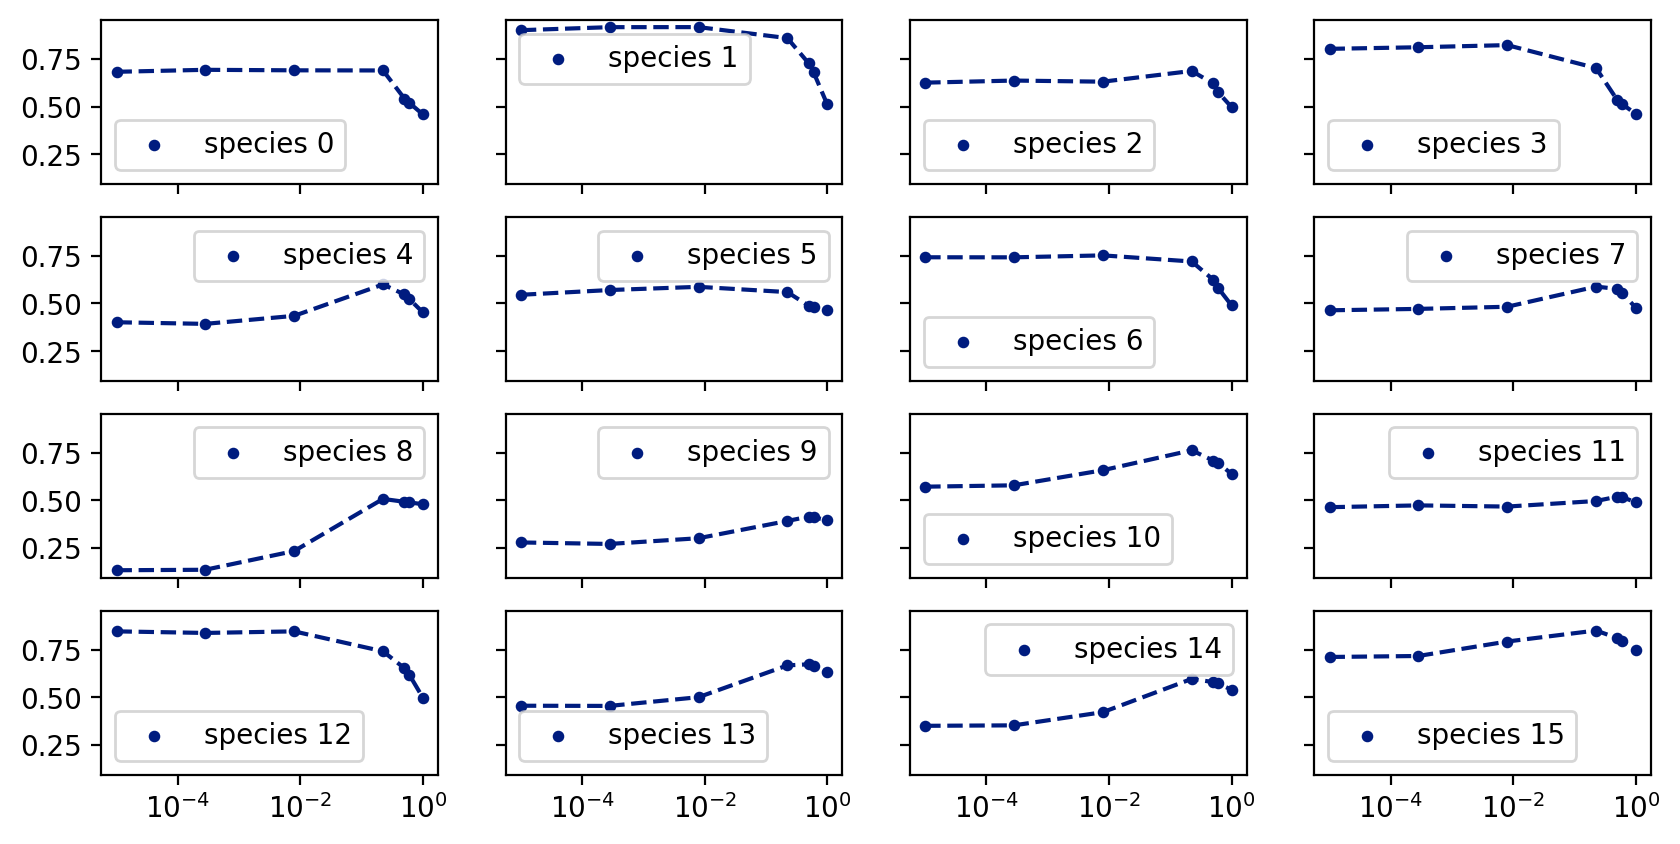

In [59]:
fig,ax = plt.subplots(4,4,figsize=(10,5),dpi=200,sharex=True,sharey=True)

for species in range(16):
    plt.subplot(4,4,species+1)
    spper = crossdf[crossdf["sp"]==species]
    kdf = spper[spper["k-fold"]==bias_var_listm[species]]
    plt.scatter(kdf["lambda"],kdf["nnseagg"],s=10,label="species " + str(species))
    plt.plot(kdf["lambda"],kdf["nnseagg"],ls="dashed")
    plt.legend()
    plt.xscale("log")


In [54]:
data1 = []
for species in range(16):
    bestm = bestwhdf[bestwhdf[1]==bias_var_listm[species]]
    bestm.index = np.arange(0,16,1)
    data1.append(bestm.iloc[species][2])
data2  = []
for species in range(16):
    bestm = bestlindf[bestlindf[1]==bias_var_listm[species]]
    bestm.index = np.arange(0,16,1)
    data2.append(bestm.iloc[species][2])

In [55]:
data12 = []
for species in range(16):
    bestm = bestwhdf[bestwhdf[1]==bias_var_listm[species]]
    bestm.index = np.arange(0,16,1)
    data12.append([bestm.iloc[species][2],bestm.iloc[species][3]])
data22  = []
for species in range(16):
    bestm = bestlindf[bestlindf[1]==bias_var_listm[species]]
    bestm.index = np.arange(0,16,1)
    data22.append([bestm.iloc[species][2],bestm.iloc[species][3]])

In [50]:
laml

[1e-05, 0.00028, 0.00794, 0.22387, 0.5, 0.6, 1.0]

In [62]:
h.to_pickle("cs-l1-perOV.pkl")